<a href="https://colab.research.google.com/github/nv-bel/previsao-house-pricing/blob/main/previs%C3%A3o-house-pricing-r2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo: Maximizar o R² da previsão dos preços de casas usando um conjunto de dados fornecido. 10% do conjunto de dados será reservado para a validação final. Os alunos trabalharão com os 90% restantes para obter a maior pontuação possível na validação final feita pelo professor.

Tópicos Cobertos:
Busca de Hiperparâmetros:

    - Importância dos hiperparâmetros no desempenho do modelo

    - Técnicas para busca de hiperparâmetros (Grid Search, Random Search, Otimização Bayesiana)

    - Exemplos práticos e exercícios em otimização de hiperparâmetros

Validação Cruzada:

    - Conceito e importância da validação cruzada no treinamento de modelos

    - Aplicação de  validação cruzada

    - Implementação de validação cruzada em Python usando scikit-learn

Regressão:

    - Decision Trees

    - Random Forests

    - Gradient Boosting
    

# Dataset

 conjunto de dados contendo diversas variáveis sobre habitação e demografia nas 50 principais cidades americanas por população.

Variáveis:

 - Código Postal: Código postal onde o anúncio está localizado.
 - Preço: Preço listado para o imóvel.
 - Camas: Número de camas mencionadas no anúncio.
 - Banheiros: Número de banheiros mencionados no anúncio.
 - Espaço Habitável: O tamanho total do espaço habitável, em pés quadrados, mencionado no anúncio.
 - Endereço: Endereço da rua do anúncio.
 - Cidade: Nome da cidade onde o anúncio está localizado.
 - Estado: Nome do estado onde o anúncio está localizado.
 - População do Código Postal: O número estimado de indivíduos dentro do código postal. Dados de Simplemaps.com.
 - Densidade do Código Postal: O número estimado de indivíduos por milha quadrada dentro do código postal. Dados de Simplemaps.com.
 - Condado: Condado onde o anúncio está localizado.
- Renda Média das Famílias: Renda familiar média estimada. Dados do U.S. Census Bureau.
- Latitude: Latitude do código postal. Dados de Simplemaps.com.
- Longitude: Longitude do código postal. Dados de Simplemaps.com.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

file_path = 'dataset_90_percent.csv'
df = pd.read_csv(file_path, sep=',')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35983 entries, 0 to 35982
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 35983 non-null  int64  
 1   Price                    35983 non-null  float64
 2   Beds                     35983 non-null  int64  
 3   Baths                    35983 non-null  int64  
 4   Living Space             35983 non-null  int64  
 5   Address                  35983 non-null  object 
 6   City                     35983 non-null  object 
 7   State                    35983 non-null  object 
 8   Zip Code Population      35983 non-null  int64  
 9   Zip Code Density         35983 non-null  float64
 10  County                   35983 non-null  object 
 11  Median Household Income  35981 non-null  float64
 12  Latitude                 35983 non-null  float64
 13  Longitude                35983 non-null  float64
dtypes: float64(5), int64(5

In [ ]:
df_limpo = df.drop(['Zip Code', 'Address', 'City'], axis=1) #dropa as colunas nao muito relevantes e/ou que causam redundancia

df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35983 entries, 0 to 35982
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    35983 non-null  float64
 1   Beds                     35983 non-null  int64  
 2   Baths                    35983 non-null  int64  
 3   Living Space             35983 non-null  int64  
 4   State                    35983 non-null  object 
 5   Zip Code Population      35983 non-null  int64  
 6   Zip Code Density         35983 non-null  float64
 7   County                   35983 non-null  object 
 8   Median Household Income  35981 non-null  float64
 9   Latitude                 35983 non-null  float64
 10  Longitude                35983 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 3.0+ MB


In [ ]:
df_limpo = df_limpo.dropna(axis=0) #dropa linhas nulas
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35981 entries, 0 to 35982
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    35981 non-null  float64
 1   Beds                     35981 non-null  int64  
 2   Baths                    35981 non-null  int64  
 3   Living Space             35981 non-null  int64  
 4   State                    35981 non-null  object 
 5   Zip Code Population      35981 non-null  int64  
 6   Zip Code Density         35981 non-null  float64
 7   County                   35981 non-null  object 
 8   Median Household Income  35981 non-null  float64
 9   Latitude                 35981 non-null  float64
 10  Longitude                35981 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 3.3+ MB


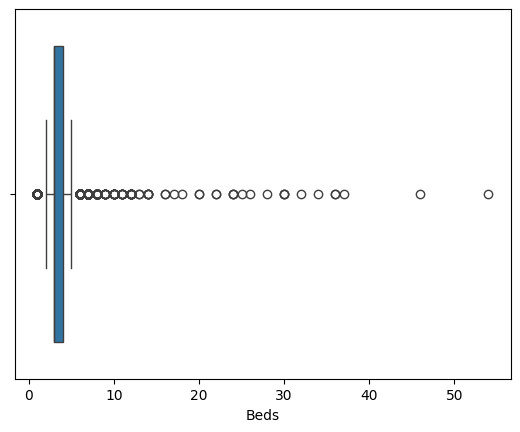

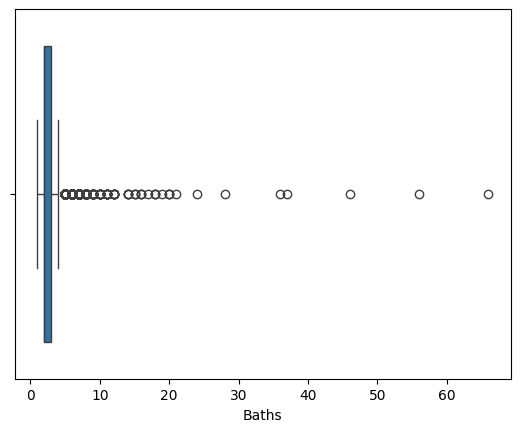

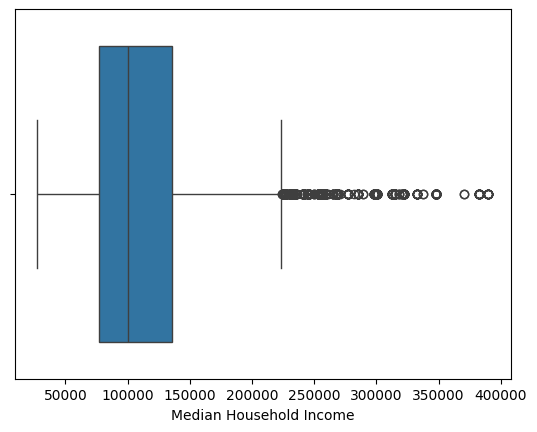

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df_limpo['Beds'])
plt.show()

sns.boxplot(x=df_limpo['Baths'])
plt.show()

sns.boxplot(x=df_limpo['Median Household Income'])
plt.show()


In [ ]:
df_limpo.sort_values(by='Median Household Income', ascending=False)

,Price,Beds,Baths,Living Space,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
34318,1750000.0,4,4,3152,North Carolina,9733,1546.7,Mecklenburg,389928.0,35.19512,-80.82606
35450,315000.0,2,2,939,North Carolina,9733,1546.7,Mecklenburg,389928.0,35.19512,-80.82606
11732,779900.0,4,2,1511,North Carolina,9733,1546.7,Mecklenburg,389928.0,35.19512,-80.82606
9096,269900.0,1,1,679,North Carolina,9733,1546.7,Mecklenburg,389928.0,35.19512,-80.82606
26902,299000.0,2,2,964,North Carolina,9733,1546.7,Mecklenburg,389928.0,35.19512,-80.82606
...,...,...,...,...,...,...,...,...,...,...,...
14211,142000.0,4,2,1200,Tennessee,5660,1176.2,Shelby,31438.0,35.12695,-90.04378
25879,30000.0,3,2,1400,Tennessee,5660,1176.2,Shelby,31438.0,35.12695,-90.04378
5808,89900.0,4,2,1772,Wisconsin,14627,3222.2,Milwaukee,27475.0,43.03694,-87.93364
23895,178000.0,4,3,1974,Wisconsin,14627,3222.2,Milwaukee,27475.0,43.03694,-87.93364


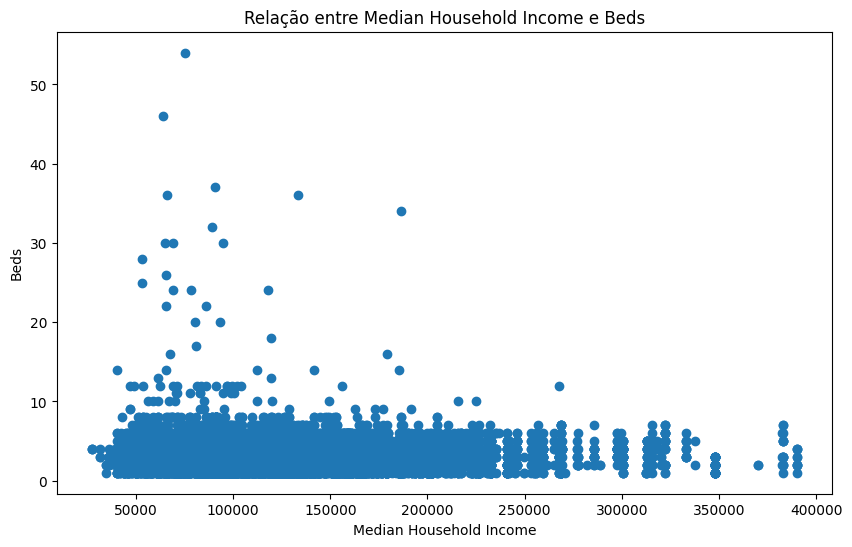

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['Median Household Income'], df['Beds'])
plt.title('Relação entre Median Household Income e Beds')
plt.xlabel('Median Household Income')
plt.ylabel('Beds')
plt.show()


In [ ]:
X = df_limpo.drop(['Price'], axis=1) #target
y = df_limpo['Price']

In [ ]:
X.columns

Index(['Beds', 'Baths', 'Living Space', 'State', 'Zip Code Population',
       'Zip Code Density', 'County', 'Median Household Income', 'Latitude',
       'Longitude'],
      dtype='object')

In [ ]:
X = pd.get_dummies(X, drop_first=True, columns=['County', 'State'])


In [ ]:
X.head()

,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude,County_Alameda,County_Anne Arundel,...,State_North Carolina,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Tennessee,State_Texas,State_Virginia,State_Washington,State_Wisconsin
0,3,2,1802,36760,1209.2,127576.0,39.86760,-86.10818,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,615,51966,3079.3,65249.0,36.11236,-115.21215,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,3,1300,85024,639.9,101076.0,32.57800,-116.96621,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5,4,3304,88116,1762.8,93714.0,36.80003,-119.87791,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,3,1224,75073,1334.2,84503.0,36.06704,-86.72345,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

y_train

15039     225000.0
24970     299900.0
14582     295000.0
32807     269000.0
19197     435000.0
           ...    
16850     189000.0
6265      222950.0
11284     209999.0
860       260000.0
15795    1200000.0
Name: Price, Length: 32382, dtype: float64

In [ ]:
X_train.dtypes

Beds                     int64
Baths                    int64
Living Space             int64
Zip Code Population      int64
Zip Code Density       float64
                        ...   
State_Tennessee           bool
State_Texas               bool
State_Virginia            bool
State_Washington          bool
State_Wisconsin           bool
Length: 122, dtype: object

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

regressor = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [150],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [3]
}
#DROP 'Zip Code', 'Address', 'City' / DUMMIES 'County', 'State'
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Mean Squared Error on Test Set: {mse}')
print(f'R² Score on Test Set: {r2}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 150}
Mean Squared Error on Test Set: 251034381141.69897
R² Score on Test Set: 0.7282516122513726
